In [20]:
from typing import TypedDict, Literal


class PortfolioState(TypedDict):
    amount_usd: float
    total_aud: float

In [21]:

def convert_to_aud(state: PortfolioState) -> PortfolioState:
    state['total_aud'] = state['amount_usd'] * 1.58
    return state

In [22]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("convert_to_aud_node", convert_to_aud)

builder.add_edge(START,"convert_to_aud_node")
builder.add_edge("convert_to_aud_node", END)

graph = builder.compile()

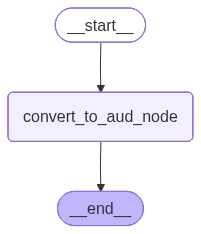

In [23]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_aud': 1580.0}